<a href="https://colab.research.google.com/github/zeloitzik/DesmosBezierRenderer/blob/master/Bagrut_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install squarify

In [ ]:
#הקשר בין הטייפ של חברה לבין מספר פריצות המידע!!!!!!!
#Cyber Security Breaches Data - https://www.kaggle.com/datasets/alukosayoenoch/cyber-security-breaches-data/data
#Companies in the states - https://en.wikipedia.org/wiki/List_of_largest_companies_in_theS_United_States_by_revenue

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import pipeline
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
import squarify
import plotly.express as px
from sklearn.preprocessing import LabelEncoder



In [132]:
df_breaches = pd.read_csv('/content/drive/MyDrive/Cyber Security Breaches.csv')
df_breaches_categories = pd.read_csv('/content/drive/MyDrive/df_breaches_categories.csv')
df_wiki = pd.read_csv('/content/drive/MyDrive/df_wiki.csv')

df_wiki

,Unnamed: 0,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,1,2,Amazon,Retail and cloud computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,2,3,ExxonMobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"
...,...,...,...,...,...,...,...,...
95,95,96,Best Buy,Retail,"46,298",10.6%,"71,100","Richfield, Minnesota"
96,96,97,Bristol-Myers Squibb,Pharmaceutical industry,"46,159",0.5%,"34,300","New York City, New York"
97,97,98,United Airlines,Airline,"44,955",82.5%,"92,795","Chicago, Illinois"
98,98,99,Thermo Fisher Scientific,Laboratory instruments,"44,915",14.5%,"130,000","Waltham, Massachusetts"


In [133]:
df_breaches_categories.head()

,Unnamed: 0.1,Unnamed: 0,Name_of_Covered_Entity,State,Individuals_Affected,Date_of_Breach,Type_of_Breach,Location_of_Breached_Information,year,Organization_type
0,0,1,Brooke Army Medical Center,TX,1000,10/16/2009,Theft,Paper,2009,Healthcare
1,1,2,"Mid America Kidney Stone Association, LLC",MO,1000,9/22/2009,Theft,Network Server,2009,Healthcare
2,2,3,Alaska Department of Health and Social Services,AK,501,10/12/2009,Theft,"Other Portable Electronic Device, Other",2009,Government
3,3,4,Health Services for Children with Special Need...,DC,3800,10/9/2009,Loss,Laptop,2009,Healthcare
4,4,5,"L. Douglas Carlson, M.D.",CA,5257,9/27/2009,Theft,Desktop Computer,2009,Legal Services


In [ ]:
#Making a request url to load the data from wiki
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html')

In [ ]:
table = soup.find_all('table')[1] #Finding the table in the url
world_titles = table.find_all('th') #Getting all of the table's column names
world_titles

[<th>Rank
 </th>,
 <th>Name
 </th>,
 <th>Industry
 </th>,
 <th>Revenue <br/>(USD millions)
 </th>,
 <th>Revenue growth
 </th>,
 <th>Employees
 </th>,
 <th>Headquarters
 </th>]

In [ ]:
world_table_titles = [title.text.strip() for title in world_titles] #Striping the </th>,
print(world_table_titles)

['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth', 'Employees', 'Headquarters']


In [130]:
#Now we need to create the dataframe
df_wiki = pd.DataFrame(columns=world_table_titles)
df_wiki

NameError: name 'world_table_titles' is not defined

In [ ]:
column_data = table.find_all('tr')


In [ ]:
for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]

    length = len(df_wiki)
    df_wiki.loc[length] = individual_row_data


In [ ]:
df_wiki.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,ExxonMobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"


In [ ]:
df_wiki = df_wiki[:100]
df_wiki.shape

(100, 7)

In [ ]:
df_wiki.to_csv('/content/sample_data/df_wiki.csv')

In [ ]:
df_data_breaches.dtypes

Unnamed: 0            int64
Entity               object
Year                 object
Records              object
Organization type    object
Method               object
Sources              object
dtype: object

In [ ]:
df_data_breaches.head()

,Unnamed: 0,Entity,Year,Records,Organization type,Method,Sources
0,0,21st Century Oncology,2016,2200000,healthcare,hacked,[5][6]
1,1,500px,2020,14870304,social networking,hacked,[7]
2,2,Accendo Insurance Co.,2020,175350,healthcare,poor security,[8][9]
3,3,Adobe Systems Incorporated,2013,152000000,tech,hacked,[10]
4,4,Adobe Inc.,2019,7500000,tech,poor security,[11][12]


In [ ]:
df_data_breaches.drop(columns=['Unnamed: 0','Sources'], inplace=True)
df_data_breaches.head()

,Entity,Year,Records,Organization type,Method
0,21st Century Oncology,2016,2200000,healthcare,hacked
1,500px,2020,14870304,social networking,hacked
2,Accendo Insurance Co.,2020,175350,healthcare,poor security
3,Adobe Systems Incorporated,2013,152000000,tech,hacked
4,Adobe Inc.,2019,7500000,tech,poor security


In [ ]:
df_breaches_categories.drop(columns=['Unnamed: 0.1'], inplace=True)
df_breaches_categories.drop(columns=['Unnamed: 0'], inplace=True)
df_breaches_categories.head()

,Name_of_Covered_Entity,State,Individuals_Affected,Date_of_Breach,Type_of_Breach,Location_of_Breached_Information,year,Organization_type
0,Brooke Army Medical Center,TX,1000,10/16/2009,Theft,Paper,2009,Healthcare
1,"Mid America Kidney Stone Association, LLC",MO,1000,9/22/2009,Theft,Network Server,2009,Healthcare
2,Alaska Department of Health and Social Services,AK,501,10/12/2009,Theft,"Other Portable Electronic Device, Other",2009,Government
3,Health Services for Children with Special Need...,DC,3800,10/9/2009,Loss,Laptop,2009,Healthcare
4,"L. Douglas Carlson, M.D.",CA,5257,9/27/2009,Theft,Desktop Computer,2009,Legal Services


In [ ]:
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Define categories
categories = [
    "Healthcare",
    "Financial Services",
    "Retail",
    "Manufacturing",
    "Education",
    "Government",
    "Agriculture",
    "Sports",
    "Science and Technology",
    "Automotive",
    "Transportation",
    "Energy",
    "Construction",
    "Media and Entertainment",
    "Legal Services",
    "Other"
]


In [ ]:
#Cleaning the data
df_breaches_categories = df_breaches.copy()
df_breaches_categories.drop(['Number','Summary', 'Date_Posted_or_Updated', 'breach_start',
          'breach_end', 'Business_Associate_Involved'], axis=1, inplace=True) #Cleaning data
df_breaches_categories.head()

In [ ]:
#Testing
result = classifier('Brooke Army Medical Center', candidate_labels=categories)
category = result['labels'][0]
print(category)

Healthcare


In [ ]:
#Sorting the companies into categories
#Takes alot of time to run, there is no need in running this cell another time after
#sorting them to categories once.
for i in df_breaches_categories.Name_of_Covered_Entity:
  result = classifier(i, candidate_labels=categories)
  category = result['labels'][0]
  df_breaches_categories.loc[df_breaches_categories.Name_of_Covered_Entity == i, 'Organization_type'] = category

In [ ]:
df_breaches_categories.to_csv('/content/sample_data/df_breaches_categories.csv') #Downloading after the data after the added categories and cleaned columns

In [ ]:
df_breaches_categories.Organization_type.value_counts()

Organization_type
Healthcare                 775
Government                  77
Other                       51
Education                   29
Legal Services              18
Financial Services          17
Science and Technology      15
Retail                      15
Energy                      11
Sports                      10
Media and Entertainment      9
Transportation               7
Manufacturing                6
Automotive                   6
Construction                 5
Agriculture                  4
Name: count, dtype: int64

In [ ]:
df_breaches_categories.shape

(1055, 14)

<ipython-input-95-84e52daa5073>:9: UserWarning:

FixedFormatter should only be used together with FixedLocator



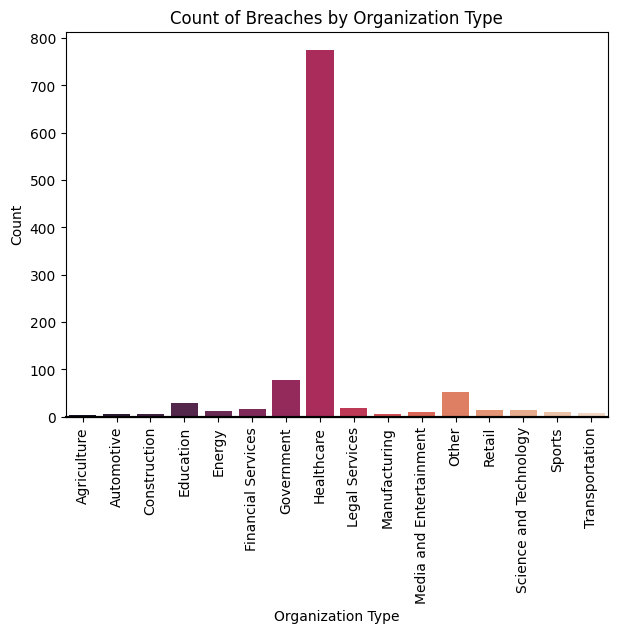

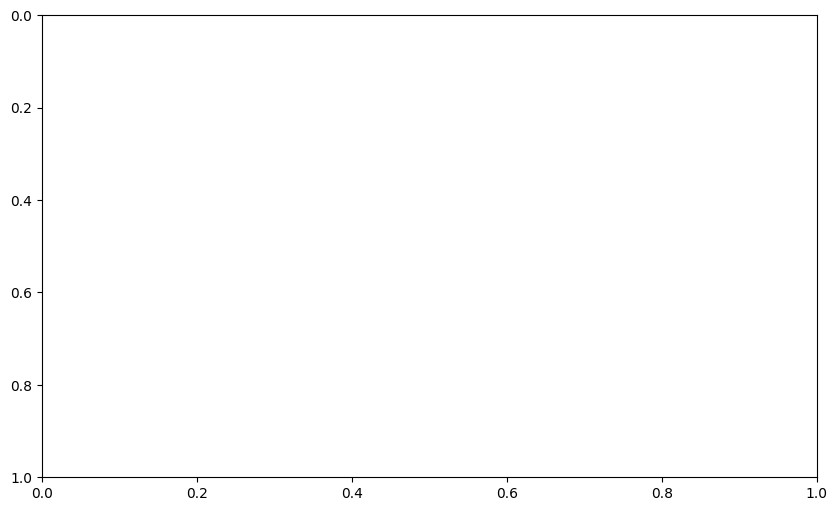

In [ ]:
#Maybe replace the graph with donut/tree
f, ax1 = plt.subplots(figsize=(7, 5))
ax1.axhline(color="k", clip_on=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Organization_type', y='count', data=df_count_breach_by_type,hue='Organization_type', palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Count")
ax1.set_xlabel("Organization Type")
ax1.set_title("Count of Breaches by Organization Type")
ax1.set_xticklabels(labels=df_count_breach_by_type['Organization_type'], rotation=90)
plt.show()

In [ ]:
df_count_breach_by_type = df_breaches_categories.groupby('Organization_type').size().reset_index(name='count')
#Creating a new dataFrame with the count of how many
#breaches by the type of organization.
df_count_breach_by_type

,Organization_type,count
0,Agriculture,4
1,Automotive,6
2,Construction,5
3,Education,29
4,Energy,11
5,Financial Services,17
6,Government,77
7,Healthcare,775
8,Legal Services,18
9,Manufacturing,6


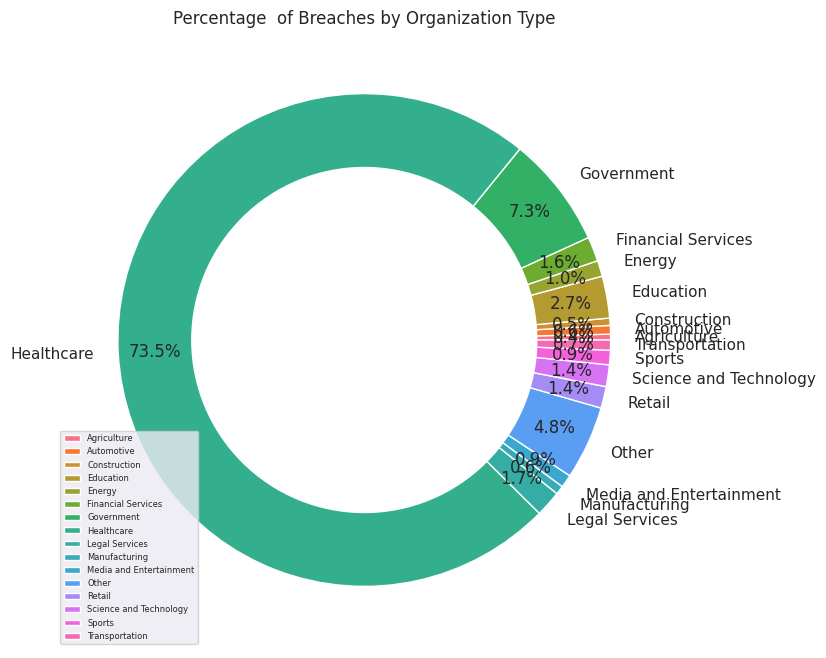

In [ ]:
#Trying a donut chart
fig = plt.figure(figsize=(12, 8))
plt.pie(df_count_breach_by_type['count'],labels=df_count_breach_by_type['Organization_type'],autopct='%1.1f%%',colors=color_palette, pctdistance=0.85)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(df_count_breach_by_type['Organization_type'], loc="lower left",prop={'size': 6})
plt.title("Percentage  of Breaches by Organization Type")
plt.show()

In [99]:
# Generate a palette of colors
color_palette = sns.color_palette("husl", 16)
print(type(color_palette))

df_pivot_2 = df_agg.pivot(index='value', columns='year', values='count')
df_pivot_2.columns

<class 'seaborn.palettes._ColorPalette'>


Index([1997, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014],
      dtype='int64', name='year')

<Figure size 1200x800 with 0 Axes>

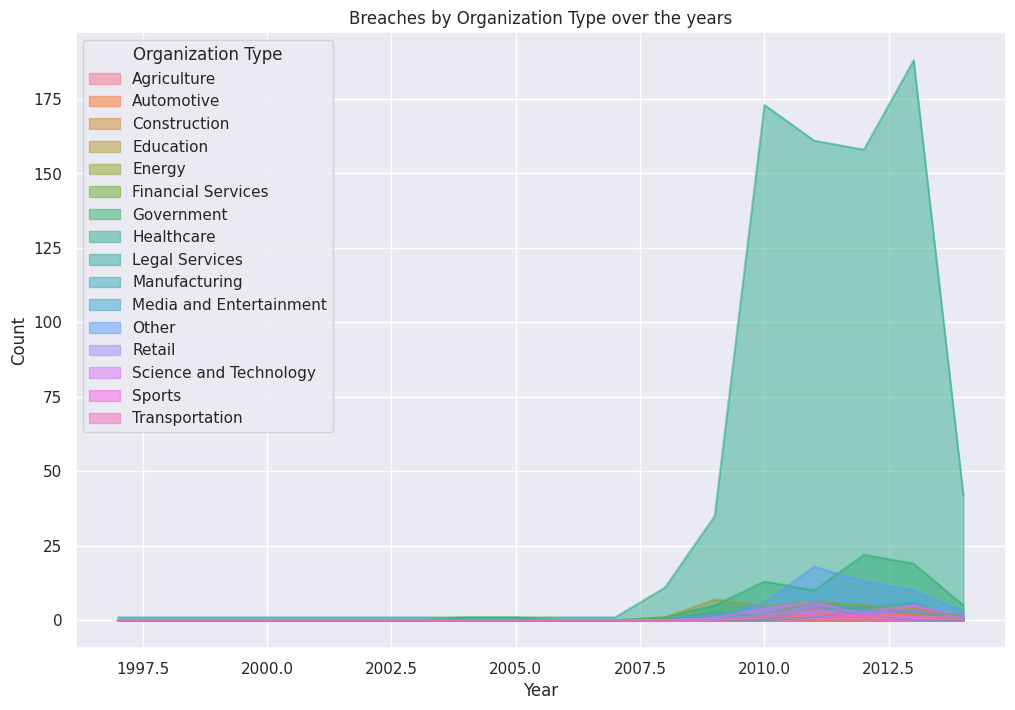

In [108]:
df_breaches_melted = df_breaches_categories.melt(id_vars=['year'], value_vars=['Organization_type'])
df_breaches_melted_r = df_breaches_melted.groupby(['year', 'value']).size().reset_index(name='count')
df_agg = df_breaches_melted_r.groupby(['year', 'value'], as_index=False).sum()
df_pivot = df_agg.pivot(index='year', columns='value', values='count')

sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
df_pivot.plot(kind='area', figsize=(12, 8), color=color_palette,stacked=False)
plt.title('Breaches by Organization Type over the years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Organization Type')
plt.show()

In [ ]:
df_by_states = df_breaches_categories.groupby('State').size().reset_index(name='count')

In [ ]:

# State abbreviation mapping
state_abbrev = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
    'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
}


# Reverse the mapping for convenience
abbrev_state = {v: k for k, v in state_abbrev.items()}


# Function to normalize state names
def normalize_state_name(state):
    if state in state_abbrev:
        return state_abbrev[state]
    elif state in abbrev_state:
        return state
    else:
        return state  # Return the original state if no match found

# Apply normalization
df_by_states['GeoName'] = df_by_states['State'].apply(normalize_state_name)
df_by_states

,State,count,GeoName
0,AK,5,Alaska
1,AL,12,Alabama
2,AR,11,Arkansas
3,AZ,21,Arizona
4,CA,113,California
5,CO,18,Colorado
6,CT,17,Connecticut
7,DC,9,DC
8,DE,3,Delaware
9,FL,66,Florida


In [ ]:
df_by_states['text'] = "State: " + df_by_states['GeoName']
df_by_states[:50]

fig = go.Figure(data=go.Choropleth(
    locations=df_by_states['State'],
    locationmode = 'USA-states',
    z=df_by_states['count'].astype(float),
    text=df_by_states['text'],
    colorscale='Blues',
    colorbar_title = 'Number of breaches per capita'

))
fig.update_layout(
    title_text='Count of Breaches by State',
    geo_scope = 'usa' #limit the map scope the us
)

fig.show()

In [125]:
df_wiki_states = df_wiki.groupby('State').size().reset_index(name='count')
df_wiki_states

,State,count
0,Arkansas,2
1,California,10
2,Connecticut,2
3,Cook County,1
4,D.C.,2
5,Florida,3
6,Georgia,3
7,Idaho,1
8,Illinois,7
9,Indiana,1


from matplotlib import pyplot as plt
df_wiki_states['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_wiki_states['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

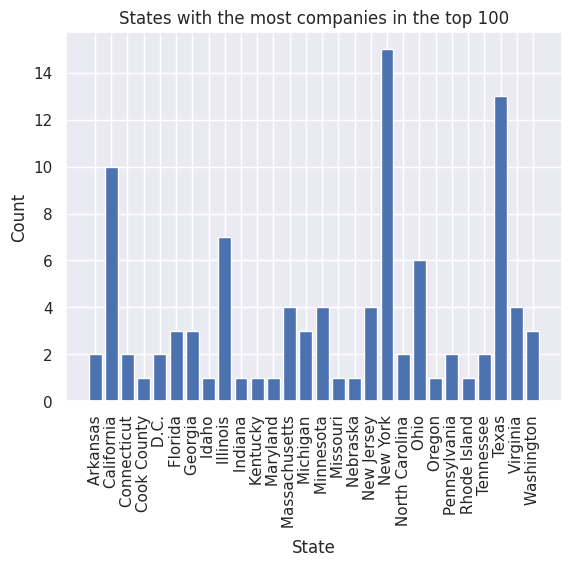

In [129]:
plt.bar(df_wiki_states['State'], df_wiki_states['count'])
plt.xlabel('State')
plt.ylabel('Count')
plt.title('States with the most companies in the top 100')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_wiki.head()

,Unnamed: 0,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,1,2,Amazon,Retail and cloud computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,2,3,ExxonMobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"


In [ ]:
df_wiki_revenue = df_wiki.groupby(by='Industry')['Revenue (USD millions)'].sum()
df_wiki_revenue = df_wiki_revenue.reset_index()
df_wiki_revenue

,Industry,Revenue (USD millions)
0,Aerospace and defense,132592.0
1,Agriculture cooperative,47194.0
2,Agriculture manufacturing,52577.0
3,Airline,144508.0
4,Apparel,46710.0
5,Automotive and energy,81462.0
6,Automotive industry,314792.0
7,Beverage,86859.0
8,Chemical industry,56902.0
9,Conglomerate,445718.0


In [ ]:
df_wiki['Revenue (USD millions)'] = df_wiki['Revenue (USD millions)'].str.replace(',', '').astype(float)

In [ ]:
fig = px.treemap(df_wiki_revenue, path=['Industry'], values='Revenue (USD millions)', title='Revenue Distribution by Industry')
fig.show()

In [ ]:
df_wiki.head()

,Unnamed: 0,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,1,2,Amazon,Retail and cloud computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,2,3,ExxonMobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"


In [110]:
df_wiki['State'] = df_wiki['Headquarters'].str.split(',').str[1]
df_wiki.head()

,Unnamed: 0,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters,State
0,0,1,Walmart,Retail,611289.0,6.7%,2100000.0,"Bentonville, Arkansas",Arkansas
1,1,2,Amazon,Retail and cloud computing,513983.0,9.4%,1540000.0,"Seattle, Washington",Washington
2,2,3,ExxonMobil,Petroleum industry,413680.0,44.8%,62000.0,"Spring, Texas",Texas
3,3,4,Apple,Electronics industry,394328.0,7.8%,164000.0,"Cupertino, California",California
4,4,5,UnitedHealth Group,Healthcare,324162.0,12.7%,400000.0,"Minnetonka, Minnesota",Minnesota


In [ ]:
df_breaches_categories.head()

,Name_of_Covered_Entity,State,Individuals_Affected,Date_of_Breach,Type_of_Breach,Location_of_Breached_Information,year,Organization_type
0,Brooke Army Medical Center,TX,1000,10/16/2009,Theft,Paper,2009,Healthcare
1,"Mid America Kidney Stone Association, LLC",MO,1000,9/22/2009,Theft,Network Server,2009,Healthcare
2,Alaska Department of Health and Social Services,AK,501,10/12/2009,Theft,"Other Portable Electronic Device, Other",2009,Government
3,Health Services for Children with Special Need...,DC,3800,10/9/2009,Loss,Laptop,2009,Healthcare
4,"L. Douglas Carlson, M.D.",CA,5257,9/27/2009,Theft,Desktop Computer,2009,Legal Services


In [ ]:
df_breaches_categories_heatmap = df_breaches_categories.copy()

In [ ]:
le = LabelEncoder()

df_breaches_categories_heatmap['State'] = le.fit_transform(df_breaches_categories_heatmap['State'])
df_breaches_categories_heatmap['Date_of_Breach'] = le.fit_transform(df_breaches_categories_heatmap['Date_of_Breach'])
df_breaches_categories_heatmap['Type_of_Breach'] = le.fit_transform(df_breaches_categories_heatmap['Type_of_Breach'])
df_breaches_categories_heatmap['Location_of_Breached_Information'] = le.fit_transform(df_breaches_categories_heatmap['Location_of_Breached_Information'])

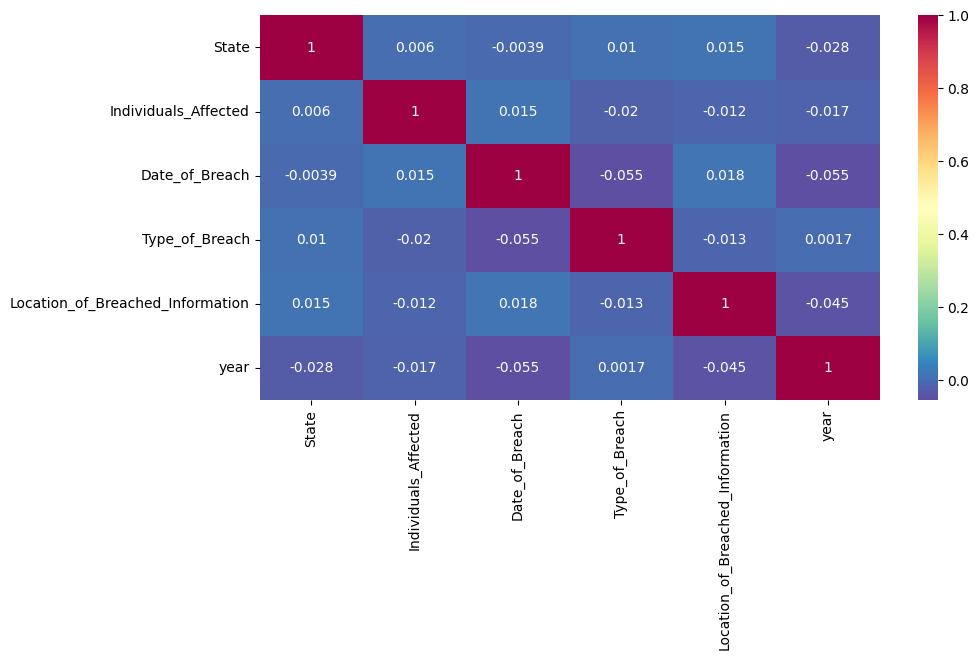

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df_breaches_categories_heatmap[['State', 'Individuals_Affected', 'Date_of_Breach', 'Type_of_Breach',
                 'Location_of_Breached_Information', 'year']].corr(), cmap='Spectral_r', annot=True);

In [ ]:
df_breaches_2006 = df_breaches_categories.copy()
df_breaches_2006 = df_breaches_2006[df_breaches_2006['year'] > 2006]

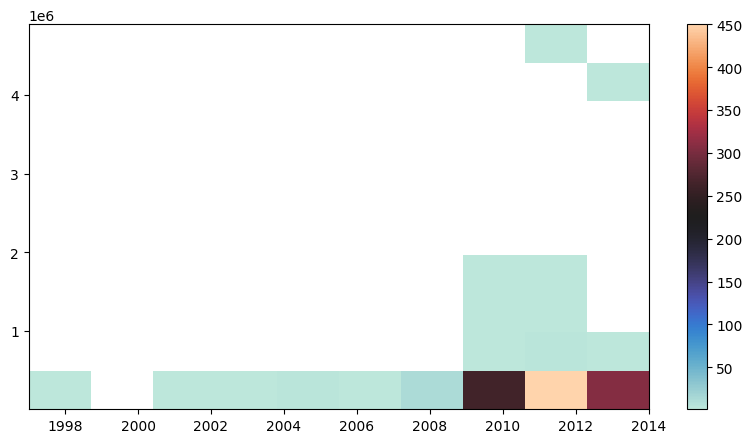

In [ ]:
plt.figure(figsize=(10,5))
plt.hist2d(data = df_breaches_categories,  y = 'Individuals_Affected', x = 'year', cmin=0.5, cmap = 'icefire')
plt.colorbar();

In [ ]:
df_breaches_type = df_breaches_categories.loc[df_breaches_categories['Type_of_Breach'].isin(df_breaches_categories['Type_of_Breach'].value_counts().index[:11])]
df_breaches_type_2006 = df_breaches_type[df_breaches_type['year'] > 2006]

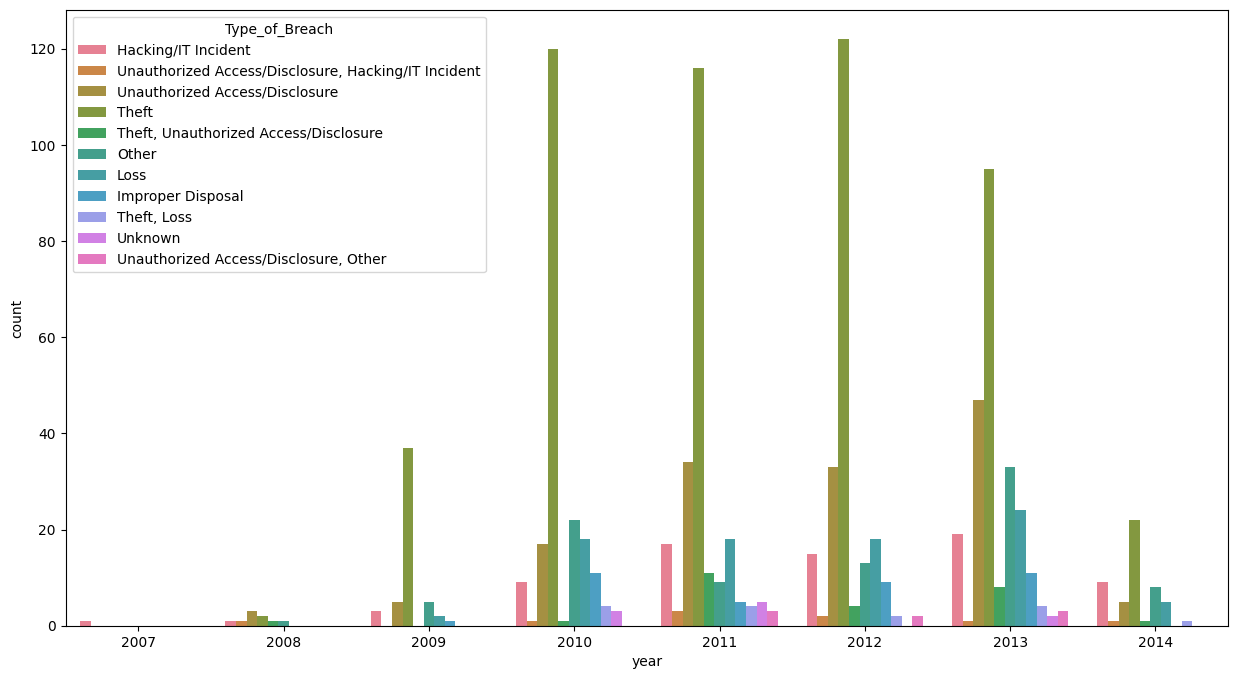

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data = df_breaches_type_2006, x = 'year', hue = 'Type_of_Breach');

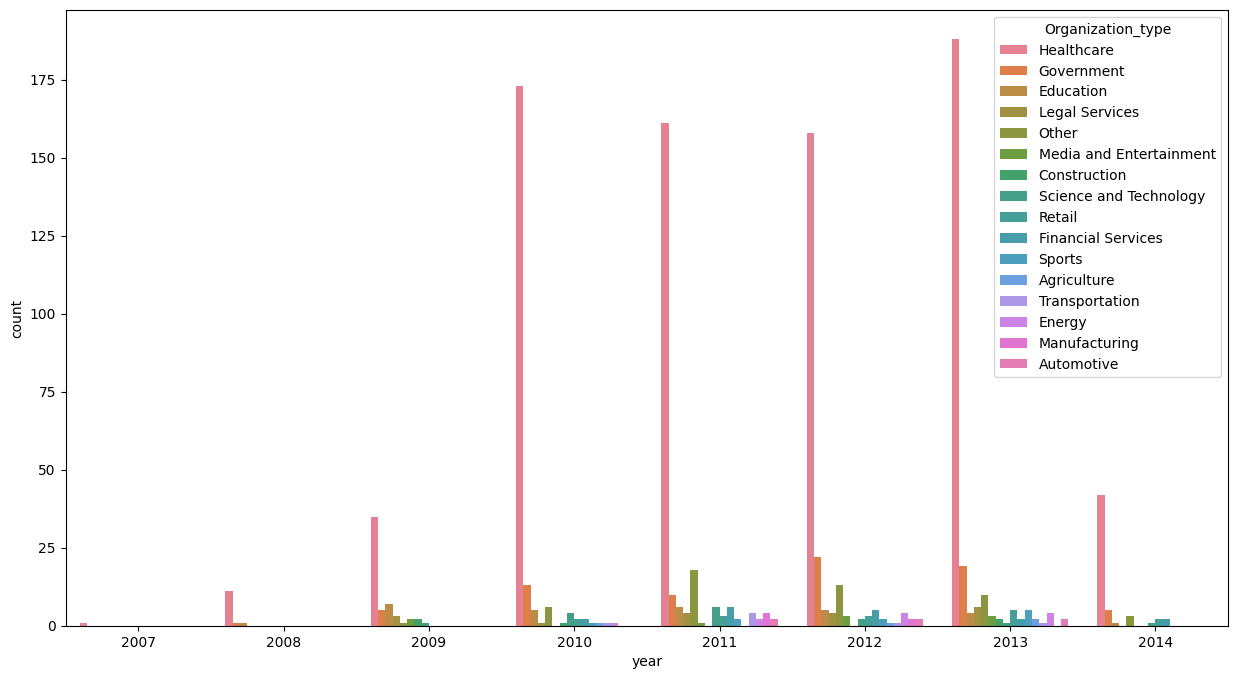

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data = df_breaches_2006, x = 'year', hue = 'Organization_type');

<ipython-input-28-f995ddfd0328>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_breaches_2006, y = 'Organization_type', x = 'year',palette="crest");


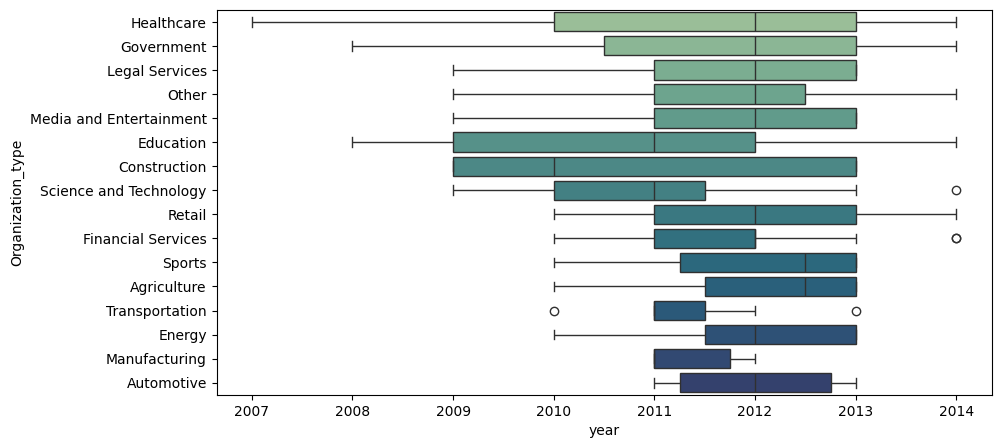

In [ ]:

plt.figure(figsize=(10,5))
sns.boxplot(data=df_breaches_2006, y = 'Organization_type', x = 'year',palette="crest");


In [ ]:
df_wiki.head()

,Unnamed: 0,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,0,1,Walmart,Retail,611289.0,6.7%,"2,100,000","Bentonville, Arkansas"
1,1,2,Amazon,Retail and cloud computing,513983.0,9.4%,"1,540,000","Seattle, Washington"
2,2,3,ExxonMobil,Petroleum industry,413680.0,44.8%,"62,000","Spring, Texas"
3,3,4,Apple,Electronics industry,394328.0,7.8%,"164,000","Cupertino, California"
4,4,5,UnitedHealth Group,Healthcare,324162.0,12.7%,"400,000","Minnetonka, Minnesota"


In [51]:
df_wiki_ridge = df_wiki.copy()

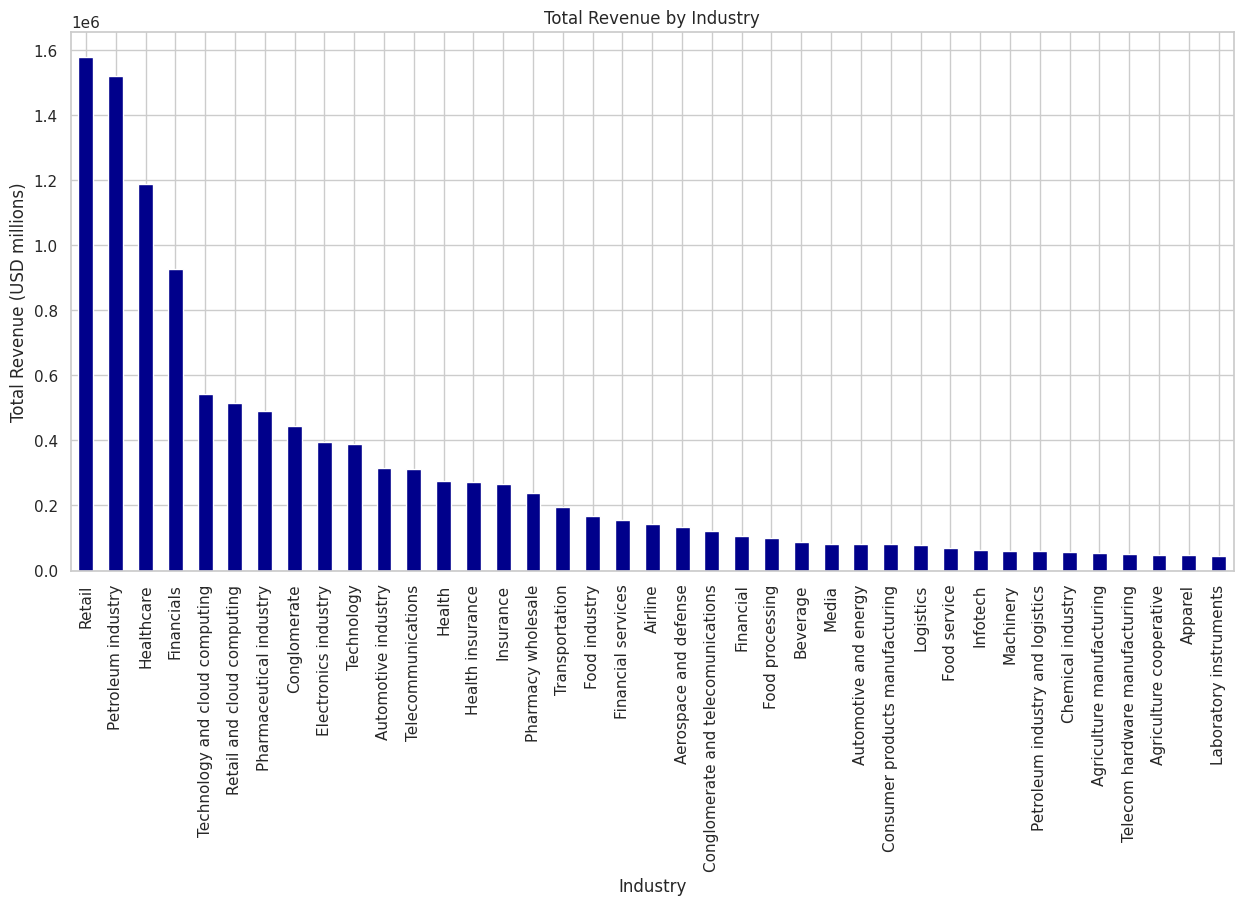

In [65]:
#Group data by industry and calculate total revenue for each industry
industry_df = df_wiki.groupby('Industry')['Revenue (USD millions)'].sum().sort_values(ascending=False)

#Create a bar chart to visualize industry revenue
plt.figure(figsize=(15,7))
industry_df.plot(kind='bar', color='darkblue')
plt.xlabel('Industry')
plt.ylabel('Total Revenue (USD millions)')
plt.title('Total Revenue by Industry')
plt.show()

In [82]:
df_wiki['Employees'] = df_wiki['Employees'].str.replace(',', '', regex=True)
df_wiki['Employees'] = pd.to_numeric(df_wiki['Employees'], errors='coerce')


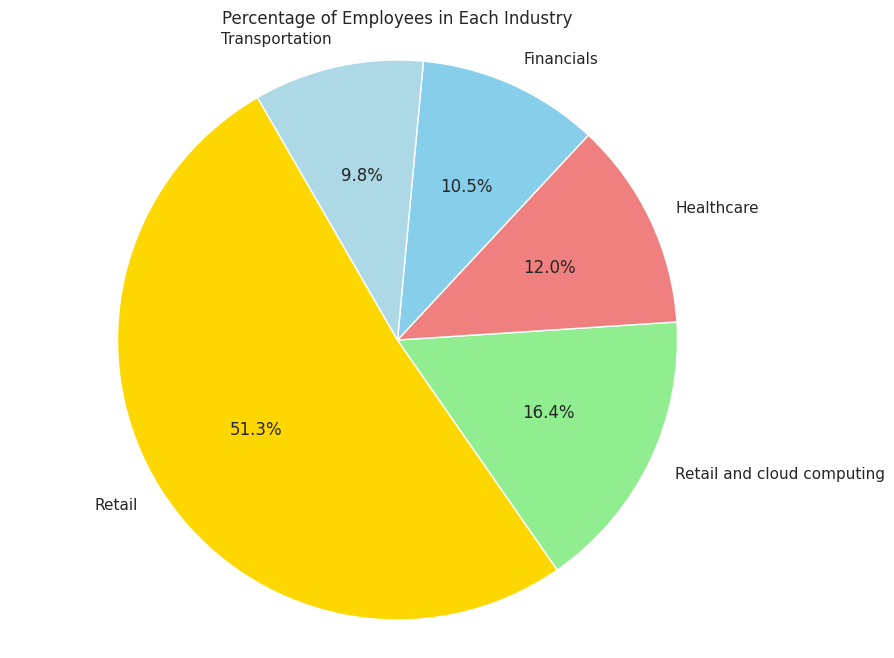

In [83]:

#Group data by industry and calculate the total number of employees in each industry
industry_employees = df_wiki.groupby('Industry')['Employees'].sum().sort_values(ascending=False).head(5)

# Create a pie chart to visualize the percentage of employees in top 5 industry
plt.figure(figsize=(10, 8))
plt.pie(industry_employees,
        labels=industry_employees.index,
        autopct='%1.1f%%', startangle=120,
        colors=['gold', 'lightgreen', 'lightcoral', 'skyblue','lightblue']
       )
plt.title('Percentage of Employees in Each Industry')
plt.axis('equal')

plt.show()

In [79]:
df_wiki

,Unnamed: 0,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,0,1,Walmart,Retail,611289.0,6.7%,"2,100,000","Bentonville, Arkansas"
1,1,2,Amazon,Retail and cloud computing,513983.0,9.4%,"1,540,000","Seattle, Washington"
2,2,3,ExxonMobil,Petroleum industry,413680.0,44.8%,"62,000","Spring, Texas"
3,3,4,Apple,Electronics industry,394328.0,7.8%,"164,000","Cupertino, California"
4,4,5,UnitedHealth Group,Healthcare,324162.0,12.7%,"400,000","Minnetonka, Minnesota"
...,...,...,...,...,...,...,...,...
95,95,96,Best Buy,Retail,46298.0,10.6%,"71,100","Richfield, Minnesota"
96,96,97,Bristol-Myers Squibb,Pharmaceutical industry,46159.0,0.5%,"34,300","New York City, New York"
97,97,98,United Airlines,Airline,44955.0,82.5%,"92,795","Chicago, Illinois"
98,98,99,Thermo Fisher Scientific,Laboratory instruments,44915.0,14.5%,"130,000","Waltham, Massachusetts"


In [62]:
df_wiki_ridge['Industry_fit']=le.fit_transform(df_wiki['Industry'])
df_wiki_ridge['Industry'] = df_wiki['Industry']

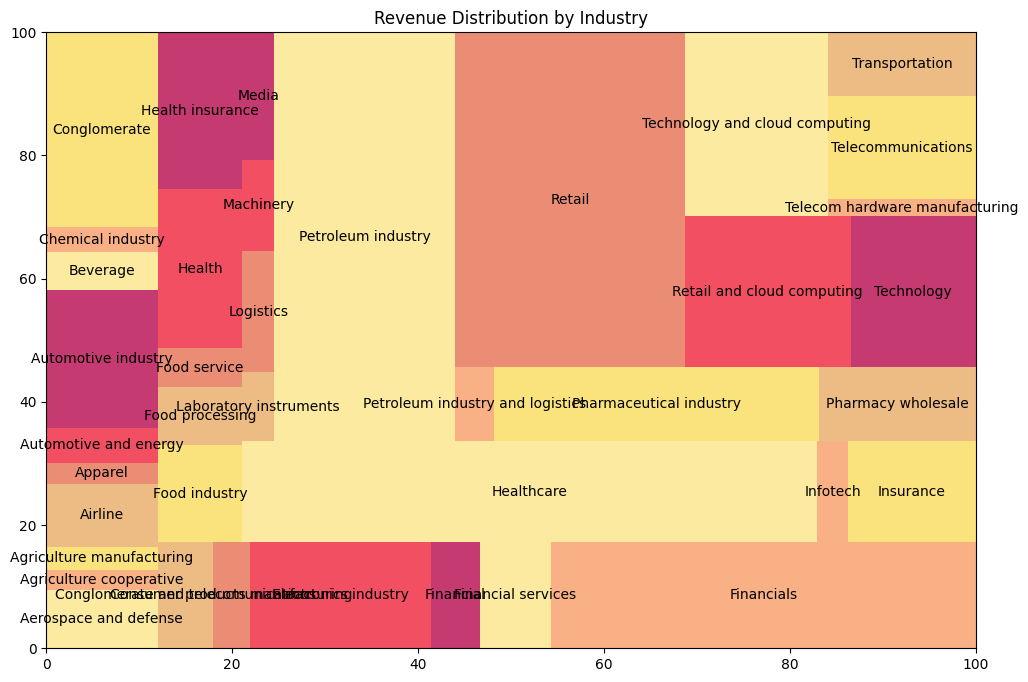

In [ ]:
# A failed attempt in creating a treemap with squarify

plt.figure(figsize=(12,8))
colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c'] #color palette
squarify.plot(sizes=df_wiki_revenue['Revenue (USD millions)'],label=df_wiki_revenue['Industry'],alpha=.8,color=colors)
plt.title('Revenue Distribution by Industry')
plt.show()